In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')

In [3]:
data

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer Lifetime Value,9134.0,8004.940475,6870.967608,1898.007675,3994.251794,5780.182197,8962.167041,83325.381190
Income,9134.0,37657.380009,30379.904734,0.000000,0.000000,33889.500000,62320.000000,99981.000000
Monthly Premium Auto,9134.0,93.219291,34.407967,61.000000,68.000000,83.000000,109.000000,298.000000
Months Since Last Claim,9134.0,15.097000,10.073257,0.000000,6.000000,14.000000,23.000000,35.000000
Months Since Policy Inception,9134.0,48.064594,27.905991,0.000000,24.000000,48.000000,71.000000,99.000000
Number of Open Complaints,9134.0,0.384388,0.910384,0.000000,0.000000,0.000000,0.000000,5.000000
Number of Policies,9134.0,2.966170,2.390182,1.000000,1.000000,2.000000,4.000000,9.000000
Total Claim Amount,9134.0,434.088794,290.500092,0.099007,272.258244,383.945434,547.514839,2893.239678


In [5]:
def snake_case(df):
    df.columns=[e.lower().replace(' ', '_') for e in df.columns]
    return

In [6]:
snake_case(data)

In [7]:
data

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [8]:
data['effective_to_date']= pd.to_datetime(data['effective_to_date'])

In [9]:
data

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2011-02-10,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2011-02-12,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2011-02-06,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2011-02-03,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [10]:
numericals = data.select_dtypes(np.number)

In [11]:
numericals

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


In [12]:
def select_discrete(numericals):
    selected = numericals.select_dtypes(include='int')
    return selected

In [13]:
discrete = select_discrete(numericals)



In [14]:
discrete

,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,56274,69,32,5,0,1
1,0,94,13,42,0,8
2,48767,108,18,38,0,2
3,0,106,18,65,0,7
4,43836,73,12,44,0,1
...,...,...,...,...,...,...
9129,71941,73,18,89,0,2
9130,21604,79,14,28,0,1
9131,0,85,9,37,3,2
9132,21941,96,34,3,0,3


In [15]:
def select_continuous(numericals):
    selected2 = numericals.select_dtypes(include='float')
    return selected2

In [16]:
continuous = select_continuous(numericals)

In [17]:
continuous

,customer_lifetime_value,total_claim_amount
0,2763.519279,384.811147
1,6979.535903,1131.464935
2,12887.431650,566.472247
3,7645.861827,529.881344
4,2813.692575,138.130879
...,...,...
9129,23405.987980,198.234764
9130,3096.511217,379.200000
9131,8163.890428,790.784983
9132,7524.442436,691.200000


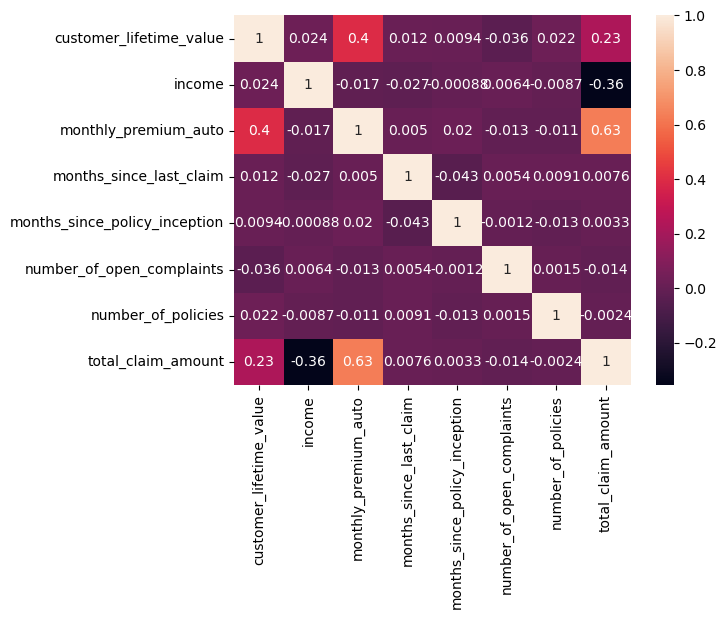

In [18]:
correlations_numerical = numericals.corr()
sns.heatmap(correlations_numerical, annot=True)
plt.show()

In [19]:
###we see very low correlations between the numerical variables in general 
###we do want to see low correlations between the "explainer" variables 
###low/close to 0 correlations means more reliable results 

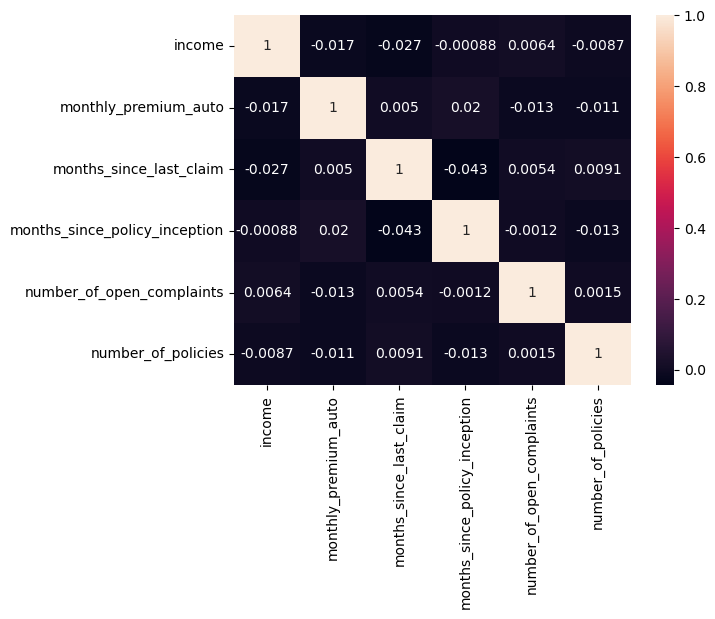

In [20]:
correlations_discrete = discrete.corr()
sns.heatmap(correlations_discrete, annot=True)
plt.show()

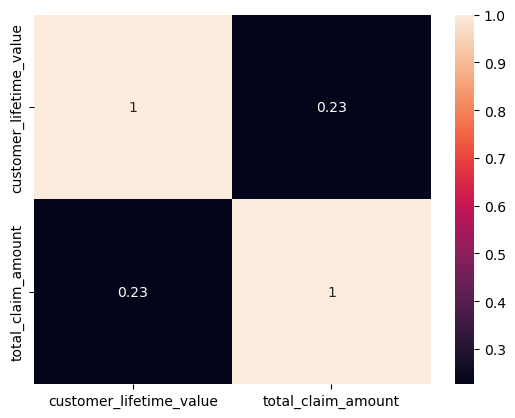

In [21]:
correlations_continuous = continuous.corr()
sns.heatmap(correlations_continuous, annot=True)
plt.show()

In [22]:
def histograms_discrete(discrete):
    for column in discrete.columns:
        plt.hist(discrete[column],bins=20) 
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.title(f'Histogram of {column}')
        plt.show()

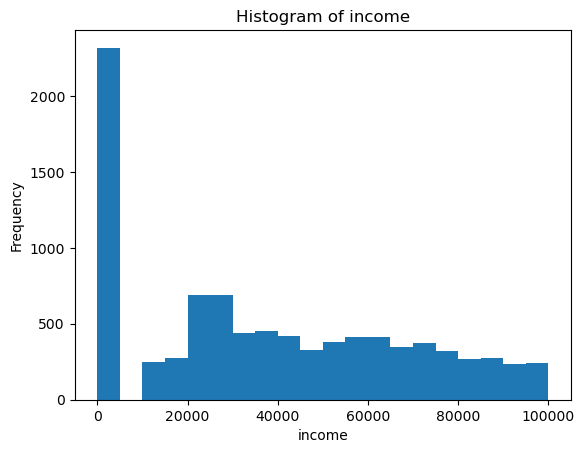

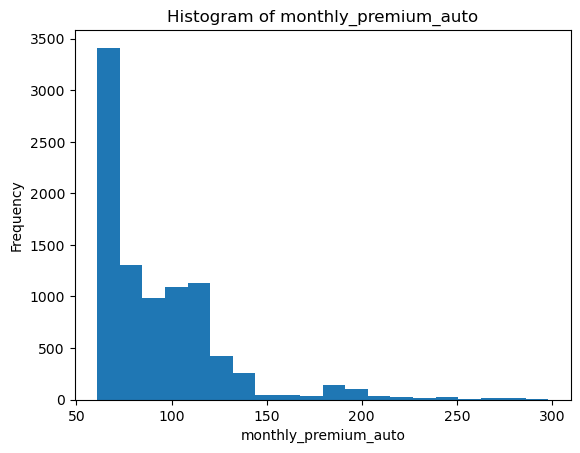

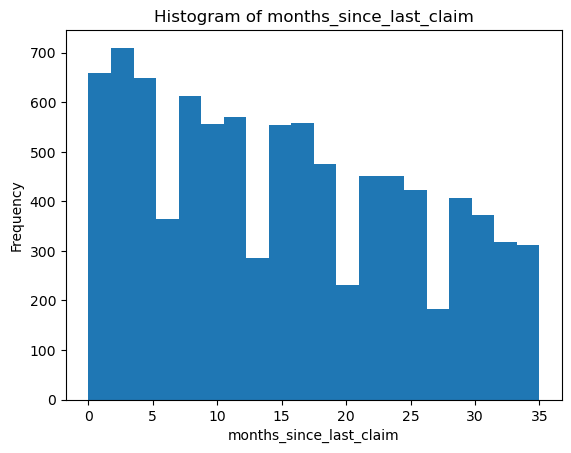

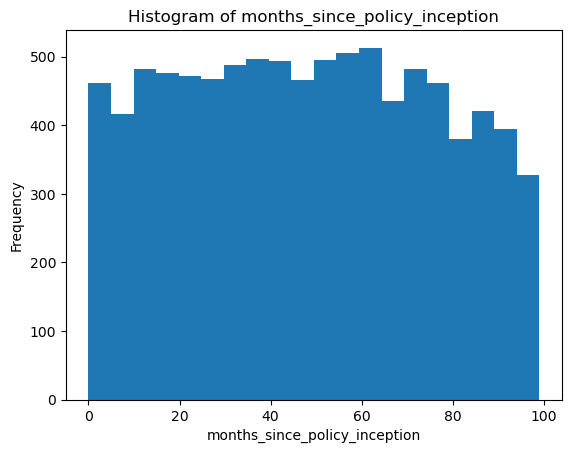

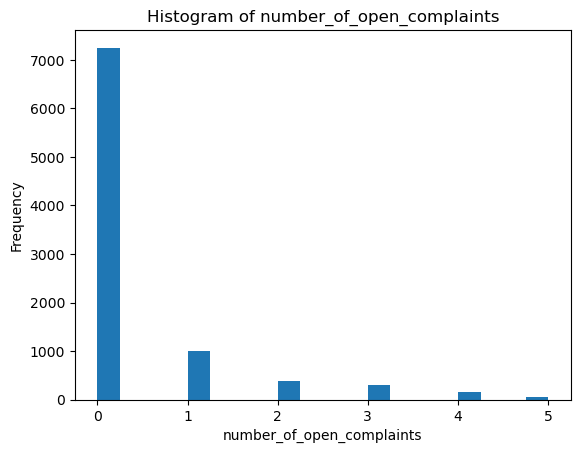

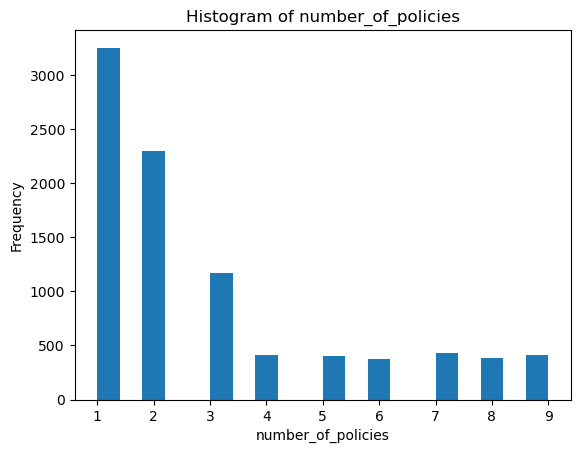

In [23]:
histograms_discrete(discrete) ##there seems to be alot of 0's in income 


In [24]:
discrete['income'].value_counts(dropna=False)

0        2317
95697      12
27972       7
25370       7
61108       7
         ... 
36529       1
25859       1
38179       1
70190       1
21941       1
Name: income, Length: 5694, dtype: int64

In [75]:
#def barplots_disc(discrete):
    #for column in discrete.columns:
        #counts = discrete[column].value_counts()
        #plt.bar(counts.index, counts.values)
        #plt.xlabel(column)
        #plt.ylabel('Frequency')
        #plt.title(f'Bar Plot of {column}')
        #plt.show()

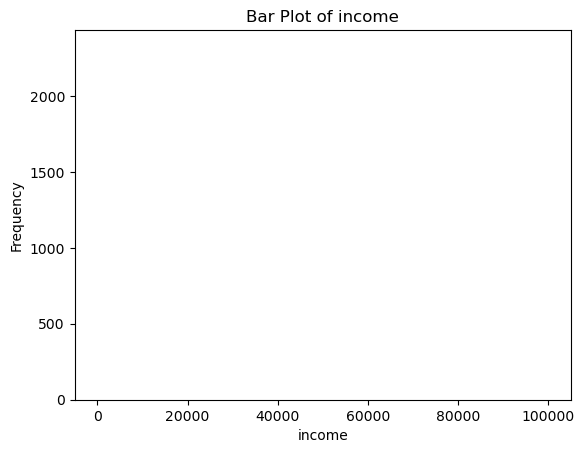

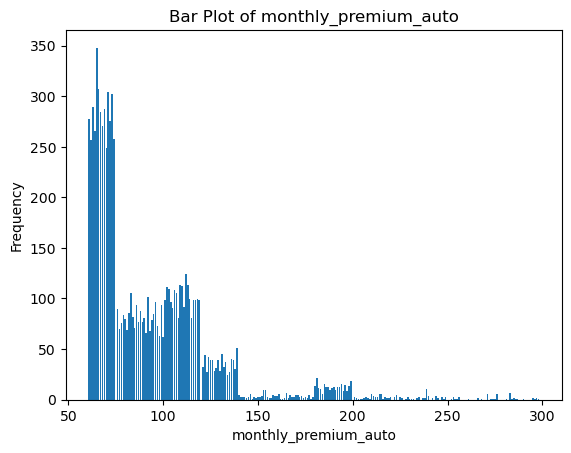

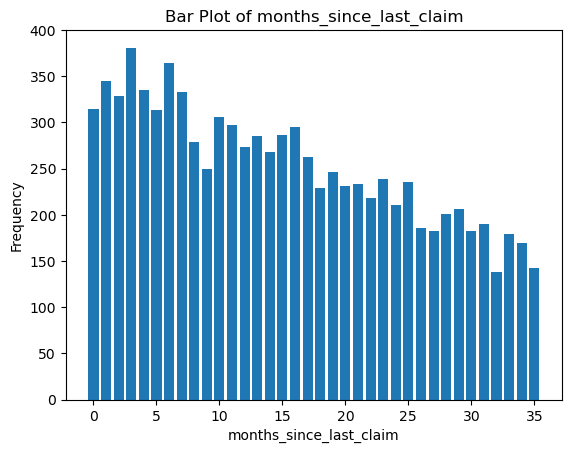

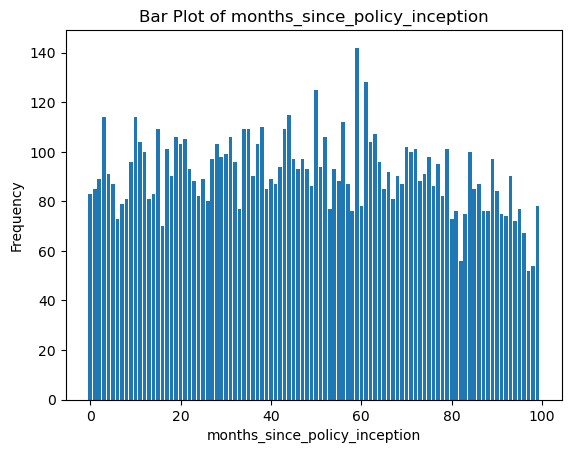

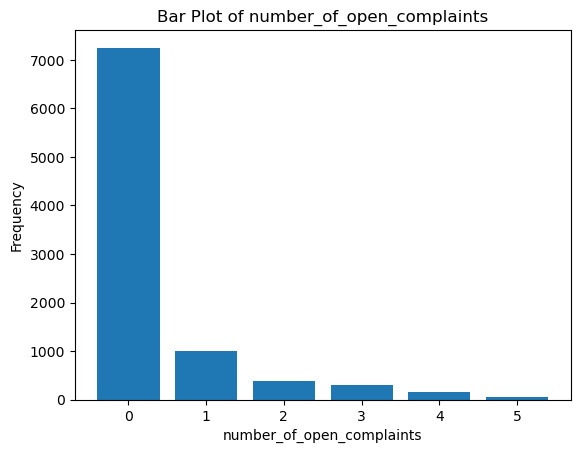

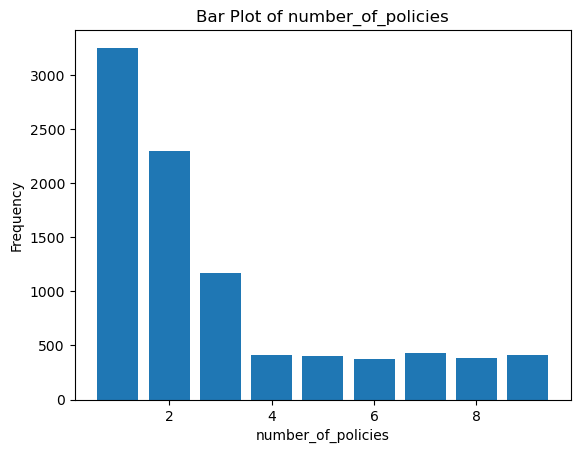

In [26]:
barplots_disc(discrete)

In [27]:
def histograms_cont(continuous):
    for column in continuous.columns:
        plt.hist(continuous[column],bins=100) 
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.title(f'Histogram of {column}')
        plt.show()

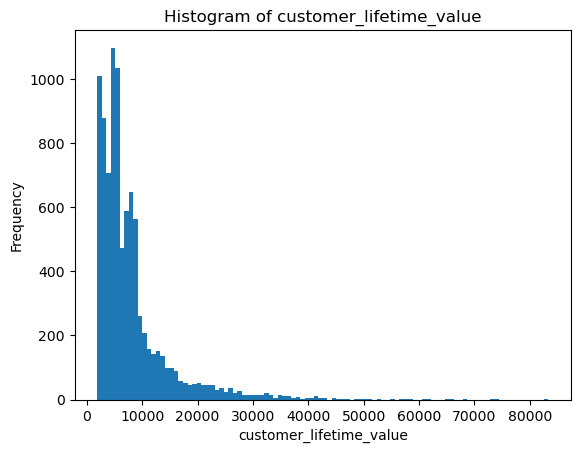

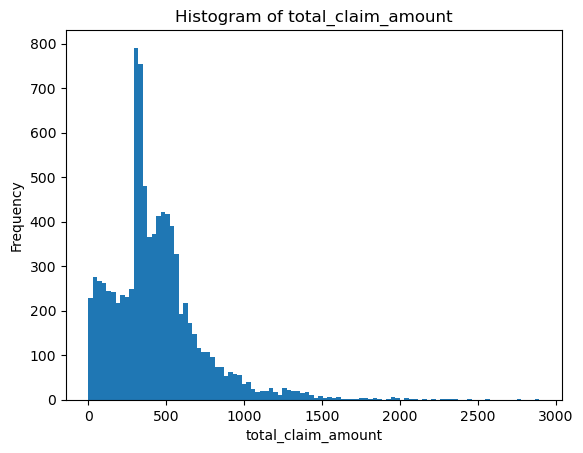

In [28]:
histograms_cont(continuous)

In [29]:
##histograms_dis(discrete)

In [30]:
def boxplots_cont(continuous):
    for column in continuous.columns:
        plt.boxplot(continuous[column])
        plt.xlabel(column)
        plt.ylabel('Value')
        plt.title(f'Box Plot of {column}')
        plt.show()

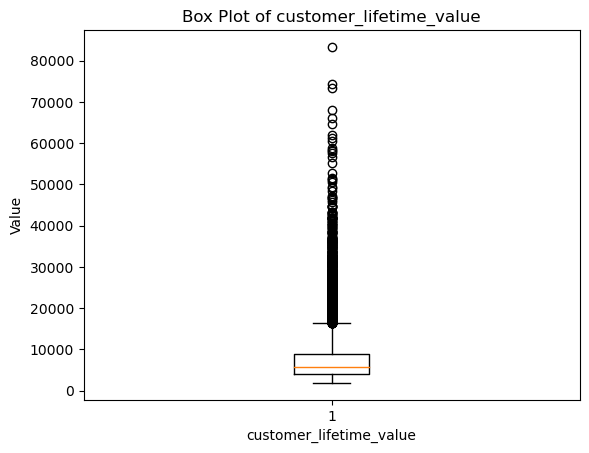

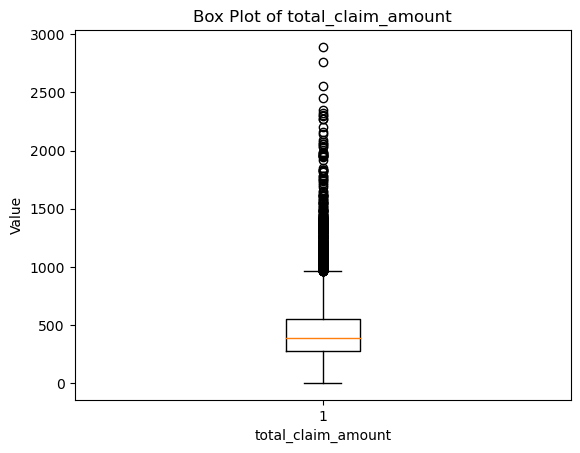

In [31]:
 boxplots_cont(continuous) ##we see only 3 points spread out at the top (for clv for example), and these are not too far out of the range,
                            ##this would indicate that we can treat these variables as they are without the outliers having a large effect
                            ###this is the same for our target variable

In [32]:
continuous.isnull().sum()

customer_lifetime_value    0
total_claim_amount         0
dtype: int64

In [33]:
data.isnull().sum() ##we dont have null values

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

In [34]:
#clv_labels = [1,2,3,4,5,6,7]
#continuous['customer_lifetime_value']= pd.qcut(continuous['customer_lifetime_value'],7,labels=clv_labels)
#continuous ##binned the customer_lifetime_value

In [35]:
#clv_labels2 = [1,2,3,4,5,6,7]
#data['customer_lifetime_value']= pd.qcut(data['customer_lifetime_value'],7,labels=clv_labels2)
#data ##binned the customer_lifetime_value also in original data

In [36]:
#data

In [37]:
#continuous['customer_lifetime_value'].value_counts()

In [38]:
#tca_labels2 = [1,2,3,4,5,6,7]
#continuous['total_claim_amount']= pd.qcut(continuous['total_claim_amount'],7,labels=tca_labels2)
#continuous ##binned the total claim amount

In [39]:
#tca_labels = [1,2,3,4,5,6,7]
#data['total_claim_amount']= pd.qcut(data['total_claim_amount'],7,labels=tca_labels)
#data ##binned the total claim amount

In [40]:
#data

In [41]:
#continuous['total_claim_amount'].value_counts()

In [42]:
#data['total_claim_amount'].value_counts()

In [43]:
log_cont = np.log(continuous)
log_cont ##we could use a log, but it shouldent be necessary

,customer_lifetime_value,total_claim_amount
0,7.924260,5.952753
1,8.850738,7.031268
2,9.464008,6.339428
3,8.941920,6.272653
4,7.942253,4.928202
...,...,...
9129,10.060747,5.289452
9130,8.038031,5.938064
9131,9.007476,6.673026
9132,8.925912,6.538429


In [44]:
log_cont = np.log(data['customer_lifetime_value'])

In [45]:
data.to_csv('datafromlab1.csv', index=False) 

# Lab 4.02

In [46]:
data

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2011-02-10,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2011-02-12,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2011-02-06,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2011-02-03,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [47]:
categoricals = data.select_dtypes(object)
categoricals

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,PK87824,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


In [48]:
data.dtypes

customer                                 object
state                                    object
customer_lifetime_value                 float64
response                                 object
coverage                                 object
education                                object
effective_to_date                datetime64[ns]
employmentstatus                         object
gender                                   object
income                                    int64
location_code                            object
marital_status                           object
monthly_premium_auto                      int64
months_since_last_claim                   int64
months_since_policy_inception             int64
number_of_open_complaints                 int64
number_of_policies                        int64
policy_type                              object
policy                                   object
renew_offer_type                         object
sales_channel                           

In [49]:
categoricals.isnull().sum() ##no nulls here either

customer            0
state               0
response            0
coverage            0
education           0
employmentstatus    0
gender              0
location_code       0
marital_status      0
policy_type         0
policy              0
renew_offer_type    0
sales_channel       0
vehicle_class       0
vehicle_size        0
dtype: int64

In [50]:
data['state'].value_counts() ##not too many states in the list

California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: state, dtype: int64

In [51]:
data['response'].value_counts() ##only yes's and no's

No     7826
Yes    1308
Name: response, dtype: int64

In [52]:
data['coverage'].value_counts()

Basic       5568
Extended    2742
Premium      824
Name: coverage, dtype: int64

In [53]:
data['gender'].value_counts()

F    4658
M    4476
Name: gender, dtype: int64

In [54]:
data['policy'].value_counts()

Personal L3     3426
Personal L2     2122
Personal L1     1240
Corporate L3    1014
Corporate L2     595
Corporate L1     359
Special L2       164
Special L3       148
Special L1        66
Name: policy, dtype: int64

In [55]:
data['policy_type'].value_counts()

Personal Auto     6788
Corporate Auto    1968
Special Auto       378
Name: policy_type, dtype: int64

In [56]:
data = data.drop('customer',axis = 1) ##dropped ID because we wont need it for the analysis

In [57]:
data = data.drop('policy_type',axis = 1) ##dropped policy type because it is redundant in the policy column

In [58]:
data

,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,...,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,...,32,5,0,1,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,Suburban,...,13,42,0,8,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,Suburban,...,18,38,0,2,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,Suburban,...,18,65,0,7,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,Rural,...,12,44,0,1,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,23405.987980,No,Basic,Bachelor,2011-02-10,Employed,M,71941,Urban,...,18,89,0,2,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,California,3096.511217,Yes,Extended,College,2011-02-12,Employed,F,21604,Suburban,...,14,28,0,1,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,California,8163.890428,No,Extended,Bachelor,2011-02-06,Unemployed,M,0,Suburban,...,9,37,3,2,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,California,7524.442436,No,Extended,College,2011-02-03,Employed,M,21941,Suburban,...,34,3,0,3,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [59]:
data[['policy', 'type']] = data['policy'].str.split(' ', 1, expand=True)

/var/folders/v3/dt262g6s2893mxzspk7wv1f40000gn/T/ipykernel_53880/330699197.py:1: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  data[['policy', 'type']] = data['policy'].str.split(' ', 1, expand=True)


In [60]:
data

,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,type
0,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,...,5,0,1,Corporate,Offer1,Agent,384.811147,Two-Door Car,Medsize,L3
1,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,Suburban,...,42,0,8,Personal,Offer3,Agent,1131.464935,Four-Door Car,Medsize,L3
2,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,Suburban,...,38,0,2,Personal,Offer1,Agent,566.472247,Two-Door Car,Medsize,L3
3,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,Suburban,...,65,0,7,Corporate,Offer1,Call Center,529.881344,SUV,Medsize,L2
4,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,Rural,...,44,0,1,Personal,Offer1,Agent,138.130879,Four-Door Car,Medsize,L1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,23405.987980,No,Basic,Bachelor,2011-02-10,Employed,M,71941,Urban,...,89,0,2,Personal,Offer2,Web,198.234764,Four-Door Car,Medsize,L1
9130,California,3096.511217,Yes,Extended,College,2011-02-12,Employed,F,21604,Suburban,...,28,0,1,Corporate,Offer1,Branch,379.200000,Four-Door Car,Medsize,L3
9131,California,8163.890428,No,Extended,Bachelor,2011-02-06,Unemployed,M,0,Suburban,...,37,3,2,Corporate,Offer1,Branch,790.784983,Four-Door Car,Medsize,L2
9132,California,7524.442436,No,Extended,College,2011-02-03,Employed,M,21941,Suburban,...,3,0,3,Personal,Offer3,Branch,691.200000,Four-Door Car,Large,L2


In [61]:
data['type'] = data['type'].replace(['L1', 'L2', 'L3'], [1,2,3]) ##will code levels into numeric values to rank

In [62]:
data

,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,type
0,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,...,5,0,1,Corporate,Offer1,Agent,384.811147,Two-Door Car,Medsize,3
1,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,Suburban,...,42,0,8,Personal,Offer3,Agent,1131.464935,Four-Door Car,Medsize,3
2,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,Suburban,...,38,0,2,Personal,Offer1,Agent,566.472247,Two-Door Car,Medsize,3
3,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,Suburban,...,65,0,7,Corporate,Offer1,Call Center,529.881344,SUV,Medsize,2
4,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,Rural,...,44,0,1,Personal,Offer1,Agent,138.130879,Four-Door Car,Medsize,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,23405.987980,No,Basic,Bachelor,2011-02-10,Employed,M,71941,Urban,...,89,0,2,Personal,Offer2,Web,198.234764,Four-Door Car,Medsize,1
9130,California,3096.511217,Yes,Extended,College,2011-02-12,Employed,F,21604,Suburban,...,28,0,1,Corporate,Offer1,Branch,379.200000,Four-Door Car,Medsize,3
9131,California,8163.890428,No,Extended,Bachelor,2011-02-06,Unemployed,M,0,Suburban,...,37,3,2,Corporate,Offer1,Branch,790.784983,Four-Door Car,Medsize,2
9132,California,7524.442436,No,Extended,College,2011-02-03,Employed,M,21941,Suburban,...,3,0,3,Personal,Offer3,Branch,691.200000,Four-Door Car,Large,2


In [63]:
data['vehicle_size'].value_counts() ##will not code size into numeric values to rank because one is not necessarily "worth" more in coverage (to my knowledge)

Medsize    6424
Small      1764
Large       946
Name: vehicle_size, dtype: int64

In [64]:
data['vehicle_class'].value_counts() ##will not code size into numeric values to rank because one is not "worth" more in coverage (to my knowledge)

Four-Door Car    4621
Two-Door Car     1886
SUV              1796
Sports Car        484
Luxury SUV        184
Luxury Car        163
Name: vehicle_class, dtype: int64

In [65]:
data['education'].value_counts() ##will code education into numeric values to rank

Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: education, dtype: int64

In [66]:
data['education'] = data['education'].replace(['High School or Below', 'College', 'Bachelor','Master','Doctor'], [1,2,3,4,5])

In [67]:
data

,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,type
0,Washington,2763.519279,No,Basic,3,2011-02-24,Employed,F,56274,Suburban,...,5,0,1,Corporate,Offer1,Agent,384.811147,Two-Door Car,Medsize,3
1,Arizona,6979.535903,No,Extended,3,2011-01-31,Unemployed,F,0,Suburban,...,42,0,8,Personal,Offer3,Agent,1131.464935,Four-Door Car,Medsize,3
2,Nevada,12887.431650,No,Premium,3,2011-02-19,Employed,F,48767,Suburban,...,38,0,2,Personal,Offer1,Agent,566.472247,Two-Door Car,Medsize,3
3,California,7645.861827,No,Basic,3,2011-01-20,Unemployed,M,0,Suburban,...,65,0,7,Corporate,Offer1,Call Center,529.881344,SUV,Medsize,2
4,Washington,2813.692575,No,Basic,3,2011-02-03,Employed,M,43836,Rural,...,44,0,1,Personal,Offer1,Agent,138.130879,Four-Door Car,Medsize,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,23405.987980,No,Basic,3,2011-02-10,Employed,M,71941,Urban,...,89,0,2,Personal,Offer2,Web,198.234764,Four-Door Car,Medsize,1
9130,California,3096.511217,Yes,Extended,2,2011-02-12,Employed,F,21604,Suburban,...,28,0,1,Corporate,Offer1,Branch,379.200000,Four-Door Car,Medsize,3
9131,California,8163.890428,No,Extended,3,2011-02-06,Unemployed,M,0,Suburban,...,37,3,2,Corporate,Offer1,Branch,790.784983,Four-Door Car,Medsize,2
9132,California,7524.442436,No,Extended,2,2011-02-03,Employed,M,21941,Suburban,...,3,0,3,Personal,Offer3,Branch,691.200000,Four-Door Car,Large,2


In [68]:
data

,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,type
0,Washington,2763.519279,No,Basic,3,2011-02-24,Employed,F,56274,Suburban,...,5,0,1,Corporate,Offer1,Agent,384.811147,Two-Door Car,Medsize,3
1,Arizona,6979.535903,No,Extended,3,2011-01-31,Unemployed,F,0,Suburban,...,42,0,8,Personal,Offer3,Agent,1131.464935,Four-Door Car,Medsize,3
2,Nevada,12887.431650,No,Premium,3,2011-02-19,Employed,F,48767,Suburban,...,38,0,2,Personal,Offer1,Agent,566.472247,Two-Door Car,Medsize,3
3,California,7645.861827,No,Basic,3,2011-01-20,Unemployed,M,0,Suburban,...,65,0,7,Corporate,Offer1,Call Center,529.881344,SUV,Medsize,2
4,Washington,2813.692575,No,Basic,3,2011-02-03,Employed,M,43836,Rural,...,44,0,1,Personal,Offer1,Agent,138.130879,Four-Door Car,Medsize,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,23405.987980,No,Basic,3,2011-02-10,Employed,M,71941,Urban,...,89,0,2,Personal,Offer2,Web,198.234764,Four-Door Car,Medsize,1
9130,California,3096.511217,Yes,Extended,2,2011-02-12,Employed,F,21604,Suburban,...,28,0,1,Corporate,Offer1,Branch,379.200000,Four-Door Car,Medsize,3
9131,California,8163.890428,No,Extended,3,2011-02-06,Unemployed,M,0,Suburban,...,37,3,2,Corporate,Offer1,Branch,790.784983,Four-Door Car,Medsize,2
9132,California,7524.442436,No,Extended,2,2011-02-03,Employed,M,21941,Suburban,...,3,0,3,Personal,Offer3,Branch,691.200000,Four-Door Car,Large,2


In [69]:
data['employmentstatus'].value_counts() ##wont code these because we cant really rank

Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: employmentstatus, dtype: int64

In [70]:
data['coverage'] = data['coverage'].replace(['Basic', 'Extended', 'Premium'], [1,2,3])

In [71]:
data.dtypes

state                                    object
customer_lifetime_value                 float64
response                                 object
coverage                                  int64
education                                 int64
effective_to_date                datetime64[ns]
employmentstatus                         object
gender                                   object
income                                    int64
location_code                            object
marital_status                           object
monthly_premium_auto                      int64
months_since_last_claim                   int64
months_since_policy_inception             int64
number_of_open_complaints                 int64
number_of_policies                        int64
policy                                   object
renew_offer_type                         object
sales_channel                            object
total_claim_amount                      float64
vehicle_class                           

In [72]:
data.to_csv('datafromlab2(codedcategoricals).csv', index=False) 

In [73]:
data.isna().sum()

state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
type                             0
dtype: int64

# Lab 4.04

In [74]:
categoricals = data.select_dtypes(object)
categoricals

,state,response,employmentstatus,gender,location_code,marital_status,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Employed,F,Suburban,Married,Corporate,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Unemployed,F,Suburban,Single,Personal,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Employed,F,Suburban,Married,Personal,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Unemployed,M,Suburban,Married,Corporate,Offer1,Call Center,SUV,Medsize
4,Washington,No,Employed,M,Rural,Single,Personal,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,Employed,M,Urban,Married,Personal,Offer2,Web,Four-Door Car,Medsize
9130,California,Yes,Employed,F,Suburban,Divorced,Corporate,Offer1,Branch,Four-Door Car,Medsize
9131,California,No,Unemployed,M,Suburban,Single,Corporate,Offer1,Branch,Four-Door Car,Medsize
9132,California,No,Employed,M,Suburban,Married,Personal,Offer3,Branch,Four-Door Car,Large


In [76]:
def barplots_cat(categoricals):
    for column in categoricals.columns:
        counts = categoricals[column].value_counts()
        plt.bar(counts.index, counts.values)
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.title(f'Bar Plot of {column}')
        plt.show()

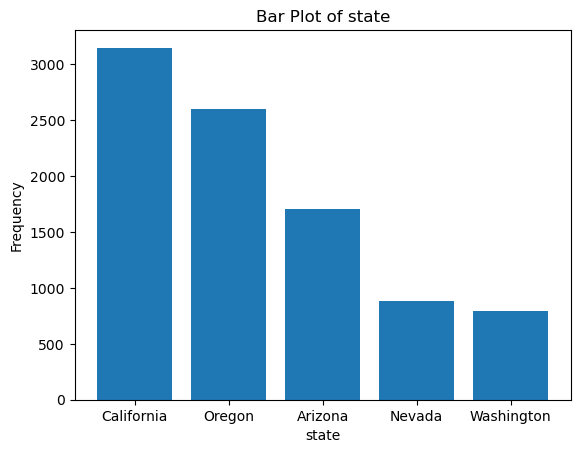

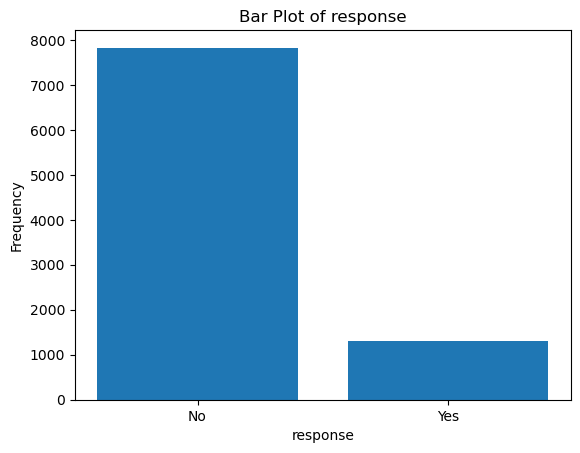

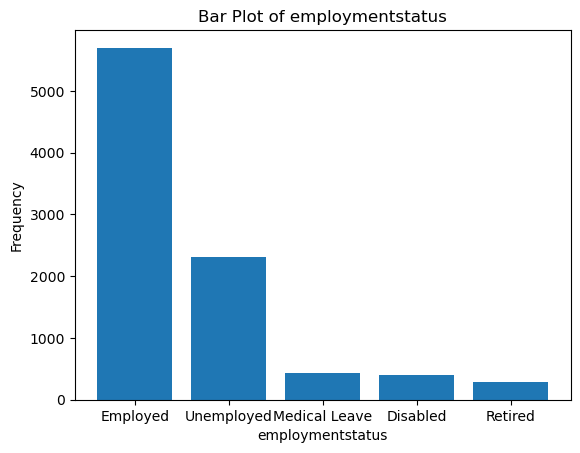

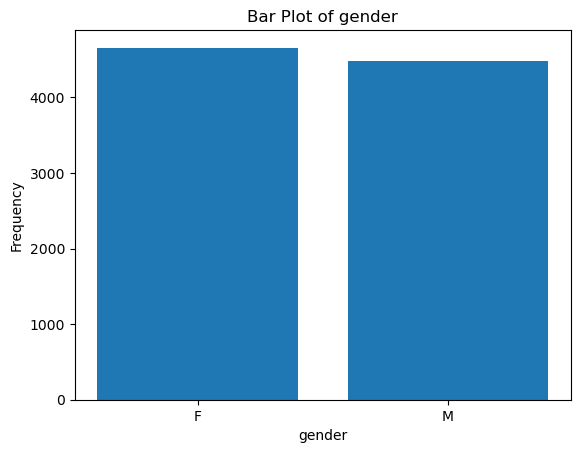

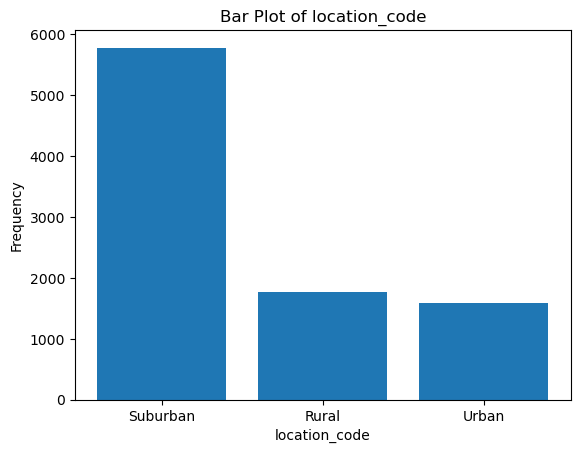

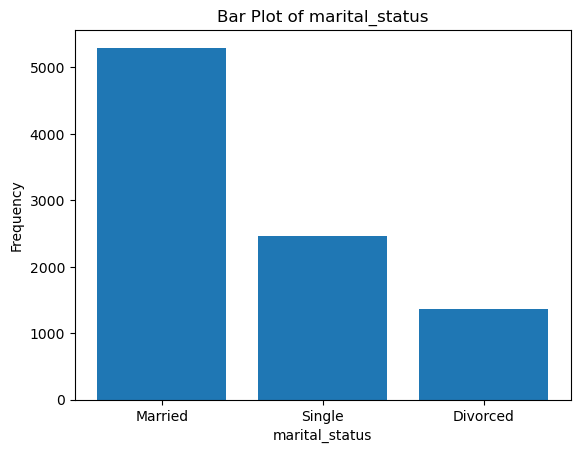

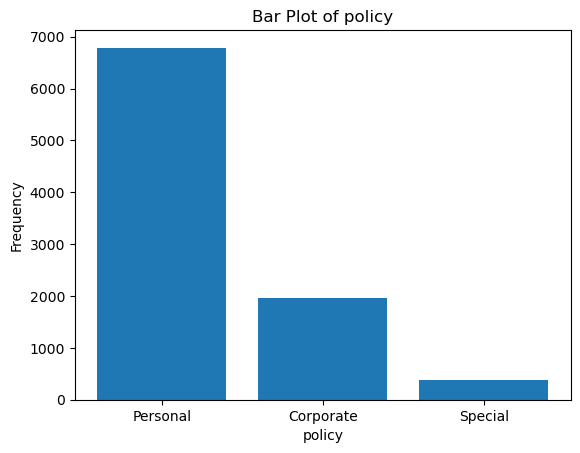

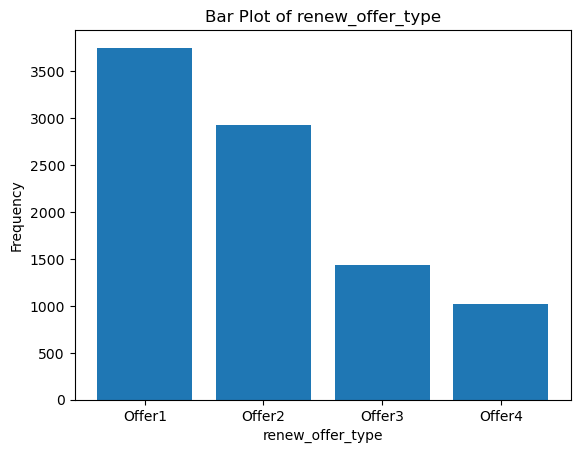

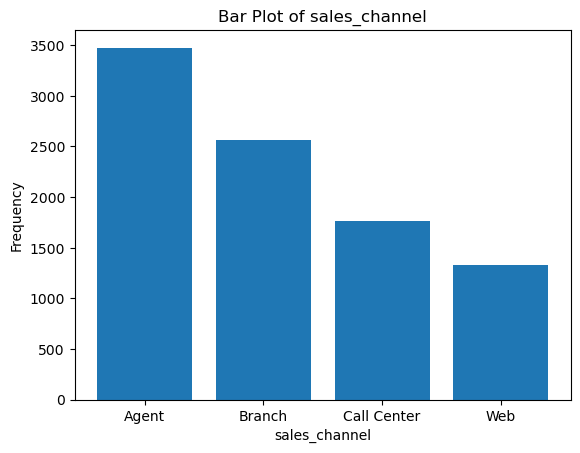

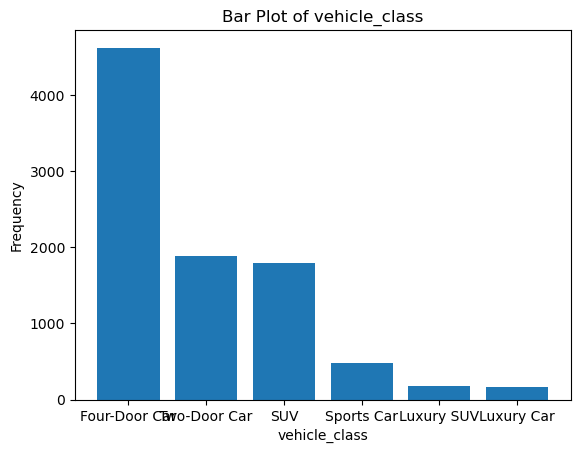

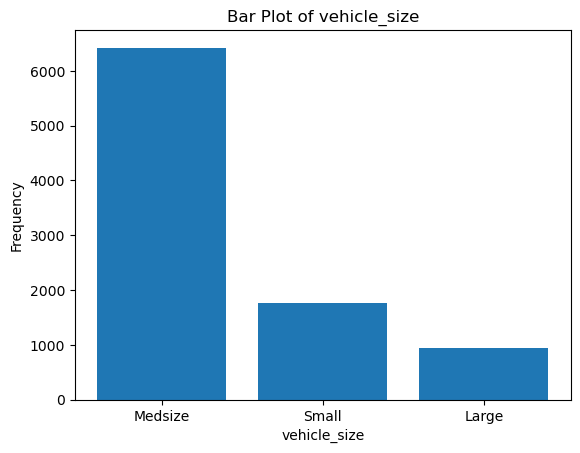

In [77]:
barplots_cat(categoricals)

In [91]:
data["year"] = data["effective_to_date"].dt.year
data["month"] = data["effective_to_date"].dt.month
data["date"] = data["effective_to_date"].dt.day

In [92]:
data

,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,...,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,type,year,month,date
0,Washington,2763.519279,No,1,3,2011-02-24,Employed,F,56274,Suburban,...,Corporate,Offer1,Agent,384.811147,Two-Door Car,Medsize,3,2011,2,24
1,Arizona,6979.535903,No,2,3,2011-01-31,Unemployed,F,0,Suburban,...,Personal,Offer3,Agent,1131.464935,Four-Door Car,Medsize,3,2011,1,31
2,Nevada,12887.431650,No,3,3,2011-02-19,Employed,F,48767,Suburban,...,Personal,Offer1,Agent,566.472247,Two-Door Car,Medsize,3,2011,2,19
3,California,7645.861827,No,1,3,2011-01-20,Unemployed,M,0,Suburban,...,Corporate,Offer1,Call Center,529.881344,SUV,Medsize,2,2011,1,20
4,Washington,2813.692575,No,1,3,2011-02-03,Employed,M,43836,Rural,...,Personal,Offer1,Agent,138.130879,Four-Door Car,Medsize,1,2011,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,23405.987980,No,1,3,2011-02-10,Employed,M,71941,Urban,...,Personal,Offer2,Web,198.234764,Four-Door Car,Medsize,1,2011,2,10
9130,California,3096.511217,Yes,2,2,2011-02-12,Employed,F,21604,Suburban,...,Corporate,Offer1,Branch,379.200000,Four-Door Car,Medsize,3,2011,2,12
9131,California,8163.890428,No,2,3,2011-02-06,Unemployed,M,0,Suburban,...,Corporate,Offer1,Branch,790.784983,Four-Door Car,Medsize,2,2011,2,6
9132,California,7524.442436,No,2,2,2011-02-03,Employed,M,21941,Suburban,...,Personal,Offer3,Branch,691.200000,Four-Door Car,Large,2,2011,2,3


In [93]:
data = data.drop('effective_to_date',axis = 1) ##this is now redundant

In [100]:
data.shape

(9134, 25)

In [102]:
dates = data.filter(['year','month','date'], axis=1)

In [103]:
dates

,year,month,date
0,2011,2,24
1,2011,1,31
2,2011,2,19
3,2011,1,20
4,2011,2,3
...,...,...,...
9129,2011,2,10
9130,2011,2,12
9131,2011,2,6
9132,2011,2,3


In [111]:
def barplots_dates(dates):
    for column in dates.columns:
        counts = dates[column].value_counts()
        plt.bar(counts.index, counts.values)
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.title(f'Bar Plot of {column}')
        plt.show()

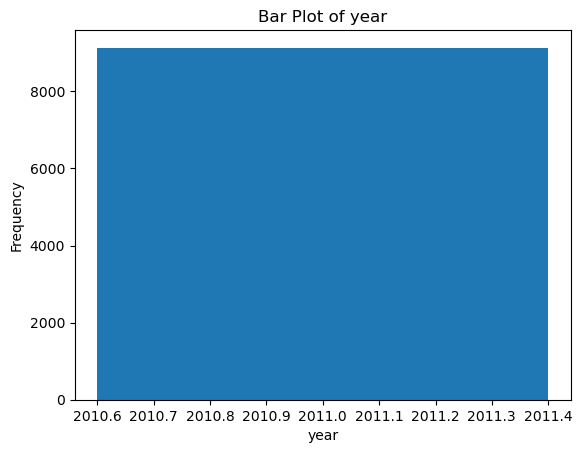

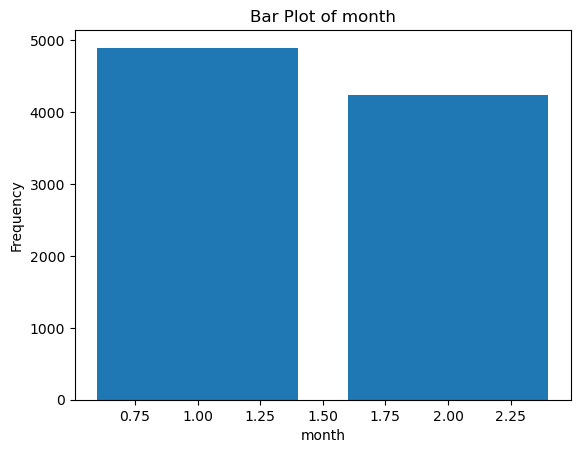

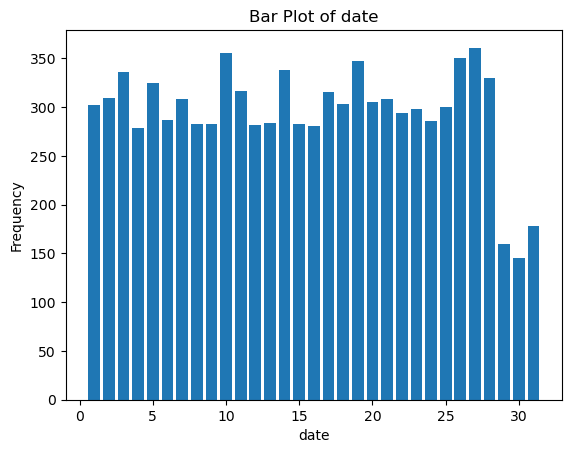

In [112]:
barplots_dates(dates)  ##we only have data from Jan and Feb of 2011

In [115]:
X = data.drop(['total_claim_amount'], axis=1)
y = data['total_claim_amount']

/var/folders/v3/dt262g6s2893mxzspk7wv1f40000gn/T/ipykernel_53880/1162434997.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(X.corr(), annot=True)


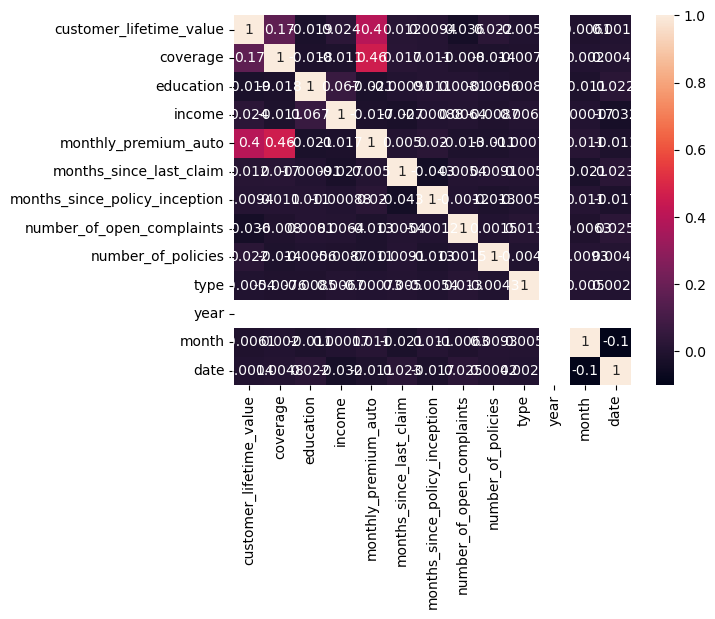

In [116]:
sns.heatmap(X.corr(), annot=True)
plt.show()  ##we see no high correlations

In [114]:
data['monthly_premium_auto'].value_counts()

65     348
66     307
71     304
73     302
63     289
      ... 
273      1
287      1
268      1
232      1
286      1
Name: monthly_premium_auto, Length: 202, dtype: int64